In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2

In [19]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [18]:
gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
DATADIR = 'd:/PetImages/'
CATEGORIES = ['Dog','Cat']

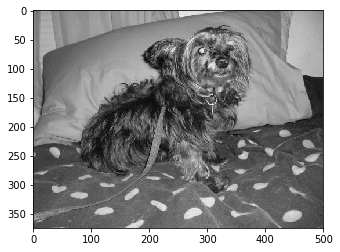

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [5]:
img_array.shape

(375, 500)

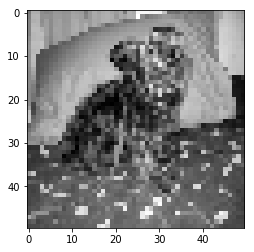

In [6]:
#makingall the shape of image to same
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [8]:
len(training_data)

24946

In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
1
1
0
1
0


In [11]:
X=[]
y=[]

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [33]:
X[0]

array([[[ 29],
        [ 29],
        [ 32],
        ...,
        [ 76],
        [ 64],
        [ 56]],

       [[ 32],
        [ 37],
        [ 39],
        ...,
        [ 63],
        [ 70],
        [ 63]],

       [[ 40],
        [ 40],
        [ 42],
        ...,
        [ 72],
        [ 69],
        [ 64]],

       ...,

       [[ 71],
        [ 77],
        [ 73],
        ...,
        [121],
        [121],
        [121]],

       [[ 72],
        [ 75],
        [ 80],
        ...,
        [128],
        [128],
        [123]],

       [[ 70],
        [ 77],
        [ 80],
        ...,
        [129],
        [130],
        [123]]], dtype=uint8)

In [34]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [2]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
X[1]

array([[[ 81],
        [ 87],
        [103],
        ...,
        [122],
        [124],
        [124]],

       [[ 78],
        [ 86],
        [102],
        ...,
        [123],
        [126],
        [119]],

       [[ 75],
        [ 79],
        [ 99],
        ...,
        [126],
        [133],
        [116]],

       ...,

       [[ 32],
        [ 29],
        [ 20],
        ...,
        [ 68],
        [ 80],
        [ 83]],

       [[ 32],
        [ 27],
        [ 20],
        ...,
        [109],
        [ 96],
        [ 65]],

       [[ 25],
        [ 20],
        [ 17],
        ...,
        [ 88],
        [ 79],
        [ 66]]], dtype=uint8)

In [4]:
y[0]

1

In [15]:
X.shape

(24946, 50, 50, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [15]:
#Normalize the data - Scale the data

X = X/255.0


In [20]:
model = Sequential()

model.add(Conv2D((64), (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D((64), (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

with tf.Session( config = tf.ConfigProto( log_device_placement = True ) ):
#     uniform_model.fit(X_train, Y_train, batch_size=1, epochs=300, verbose=1, validation_data=(X_test, Y_test)) 
    model.fit(X,y, epochs=30, batch_size=32, validation_split=0.3, verbose=1)

Train on 17462 samples, validate on 7484 samples
Epoch 1/30
17462/17462 [==============================] - 15s 851us/step - loss: 0.6425 - acc: 0.6132 - val_loss: 0.5703 - val_acc: 0.7008
Epoch 2/30
17462/17462 [==============================] - 6s 340us/step - loss: 0.5313 - acc: 0.7353 - val_loss: 0.5181 - val_acc: 0.7376
Epoch 3/30
17462/17462 [==============================] - 6s 341us/step - loss: 0.4828 - acc: 0.7741 - val_loss: 0.4771 - val_acc: 0.7762
Epoch 4/30
17462/17462 [==============================] - 6s 341us/step - loss: 0.4434 - acc: 0.7977 - val_loss: 0.4648 - val_acc: 0.7775
Epoch 5/30
17462/17462 [==============================] - 6s 340us/step - loss: 0.4161 - acc: 0.8115 - val_loss: 0.4663 - val_acc: 0.7805
Epoch 6/30
17462/17462 [==============================] - 6s 341us/step - loss: 0.3870 - acc: 0.8273 - val_loss: 0.4619 - val_acc: 0.7817
Epoch 7/30
17462/17462 [==============================] - 6s 341us/step - loss: 0.3546 - acc: 0.8425 - val_loss: 0.4559 - 

In [24]:
# import keras

# config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)